In [41]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

from autoencoder.model import Autoencoder
from eval.openclip_encoder import OpenCLIPNetwork

In [42]:
# dataset_name = 'sofa'
# ds_dir = os.path.join('data', dataset_name)

# dataset_name = 'teatime'
# ds_dir = os.path.join('data/lerf_ovs', dataset_name)

# dataset_name = 'tum2'
# ds_dir = os.path.join('/mnt/ws-frb/users/frank/frank/langsplat/rgbd_dataset_freiburg2_xyz')

dataset_name = 'tum2_rendered'
ds_dir = os.path.join('/mnt/ws-frb/users/frank/frank/langsplat/rgbd_dataset_freiburg2_xyz_rendered')

output_dir = os.path.join('output',dataset_name,)
ae_dir = os.path.join('autoencoder/ckpt', dataset_name)

encoder_hidden_dims = [256, 128, 64, 32, 3]
decoder_hidden_dims = [16, 32, 64, 128, 256, 256, 512]
device = torch.device('cuda:0')

In [43]:
# instantiate autoencoder and openclip
ae_ckpt_path = os.path.join(ae_dir, "best_ckpt.pth")
print(ae_ckpt_path)
clip_model = OpenCLIPNetwork(device)
checkpoint = torch.load(ae_ckpt_path, map_location=device)
model = Autoencoder(encoder_hidden_dims, decoder_hidden_dims).to(device)
model.load_state_dict(checkpoint)
model.eval()

autoencoder/ckpt/tum2_rendered/best_ckpt.pth
ModuleList(
  (0): Linear(in_features=512, out_features=256, bias=True)
  (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Linear(in_features=64, out_features=32, bias=True)
  (10): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Linear(in_features=32, out_features=3, bias=True)
) ModuleList(
  (0): Linear(in_features=3, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=64, bias=True)
  (5): ReLU()
  (6): Line

Autoencoder(
  (encoder): ModuleList(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=32, bias=True)
    (10): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=32, out_features=3, bias=True)
  )
  (decoder): ModuleList(
    (0): Linear(in_features=3, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=64, bias

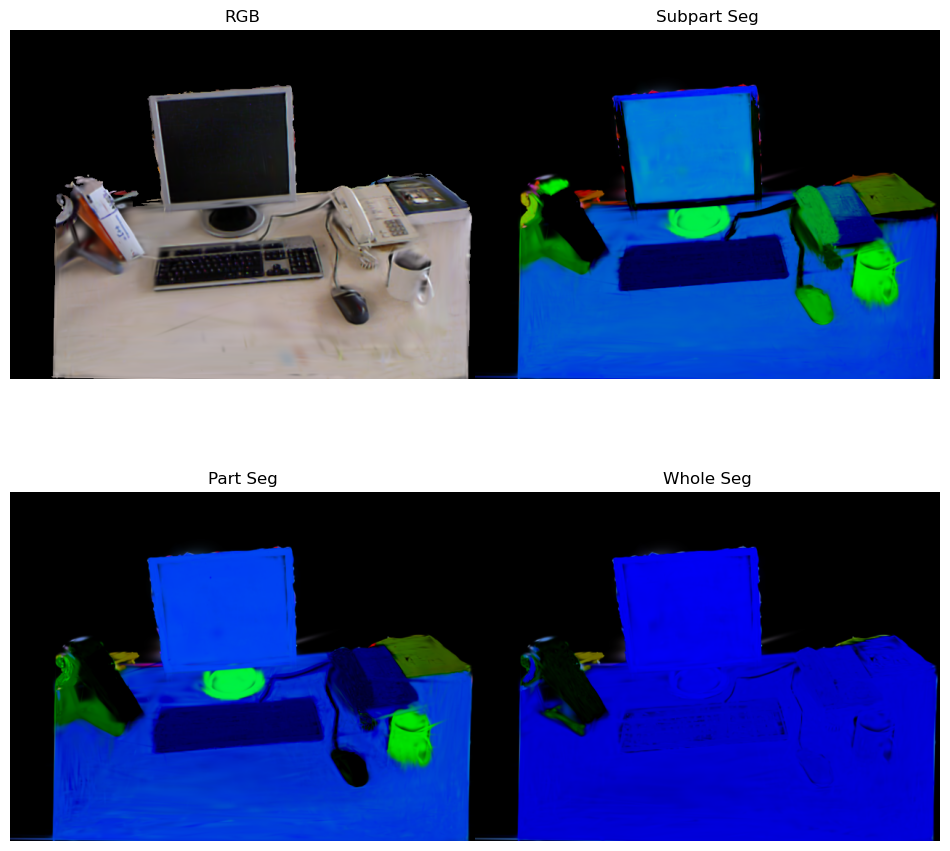

In [47]:
# TODO: pull image and features from gaussian splat
# for now lets load available data

# define path and names
# sel_img_num = 9
# rgb_img_path = os.path.join(ds_dir,'images',f'{sel_img_num:02d}.jpg')
# sem_feature_paths = [os.path.join(output_dir, dataset_name+f"_{i}", "train/ours_None/renders_npy",
#                                   f'{sel_img_num:05d}.npy')
#                      for i in range(1,4)]
# sem_render_paths = [os.path.join(output_dir, dataset_name+f"_{i}", "train/ours_None/renders",
#                                   f'{sel_img_num:05d}.png')
#                      for i in range(1,4)] # not used in pipeline, for viz only

sel_img_num = 0

# rgb_img_path = os.path.join(ds_dir,'images',f'frame_{sel_img_num:05d}.jpg')
# rgb_img_path = os.path.join(ds_dir,'images',f'1311867170.462290.png')
rgb_img_path = os.path.join(ds_dir,'images',f'{sel_img_num:05d}.png')


sem_feature_paths = [os.path.join(output_dir, dataset_name+f"_{i}", "train/ours_None/renders_npy",
                                  f'{sel_img_num:05d}.npy')
                     for i in range(1,4)]
sem_render_paths = [os.path.join(output_dir, dataset_name+f"_{i}", "train/ours_None/renders",
                                  f'{sel_img_num:05d}.png')
                     for i in range(1,4)] # not used in pipeline, for viz only


# loading
sem_feat = np.stack([np.load(sem_feat_path) for sem_feat_path in sem_feature_paths]) # (levels, height, width, encoded_dim)
rgb_img = cv2.imread(rgb_img_path)[..., ::-1]
rgb_img = (rgb_img / 255.0).astype(np.float32)
sem_img = np.stack([cv2.imread(sem_render_path) for sem_render_path in sem_render_paths])

# visualize selected imgs
fig, axs = plt.subplots(2,2, figsize=(12,12))
axs[0,0].imshow(rgb_img)
axs[0,0].title.set_text('RGB')
axs[0,1].imshow(sem_img[0])
axs[0,1].title.set_text('Subpart Seg')
axs[1,0].imshow(sem_img[1])
axs[1,0].title.set_text('Part Seg')
axs[1,1].imshow(sem_img[2])
axs[1,1].title.set_text('Whole Seg')
plt.subplots_adjust(wspace=0, hspace=0)
[ax.axis('off') for ax_row in axs for ax in ax_row];

In [48]:
# decoding of feature to original clip feature space

sem_feat = torch.from_numpy(sem_feat).float().to(device)
rgb_img = torch.from_numpy(rgb_img).to(device)

with torch.no_grad():
    lvl, h, w, _ = sem_feat.shape
    restored_feat = model.decode(sem_feat.flatten(0, 2))
    restored_feat = restored_feat.view(lvl, h, w, -1)           # (levels, height, width, clip_dim)

In [99]:
# cosine comparison
# queries = ['pikachu','gundam'] #N queries
# queries = ['apple', 'cup'] #N queries
queries = ['book', 'keyboard'] #N queries

clip_model.set_positives(queries)

valid_map = clip_model.get_max_across(restored_feat) # (levels, num_queries, height, width)
n_head, n_prompt, h, w = valid_map.shape

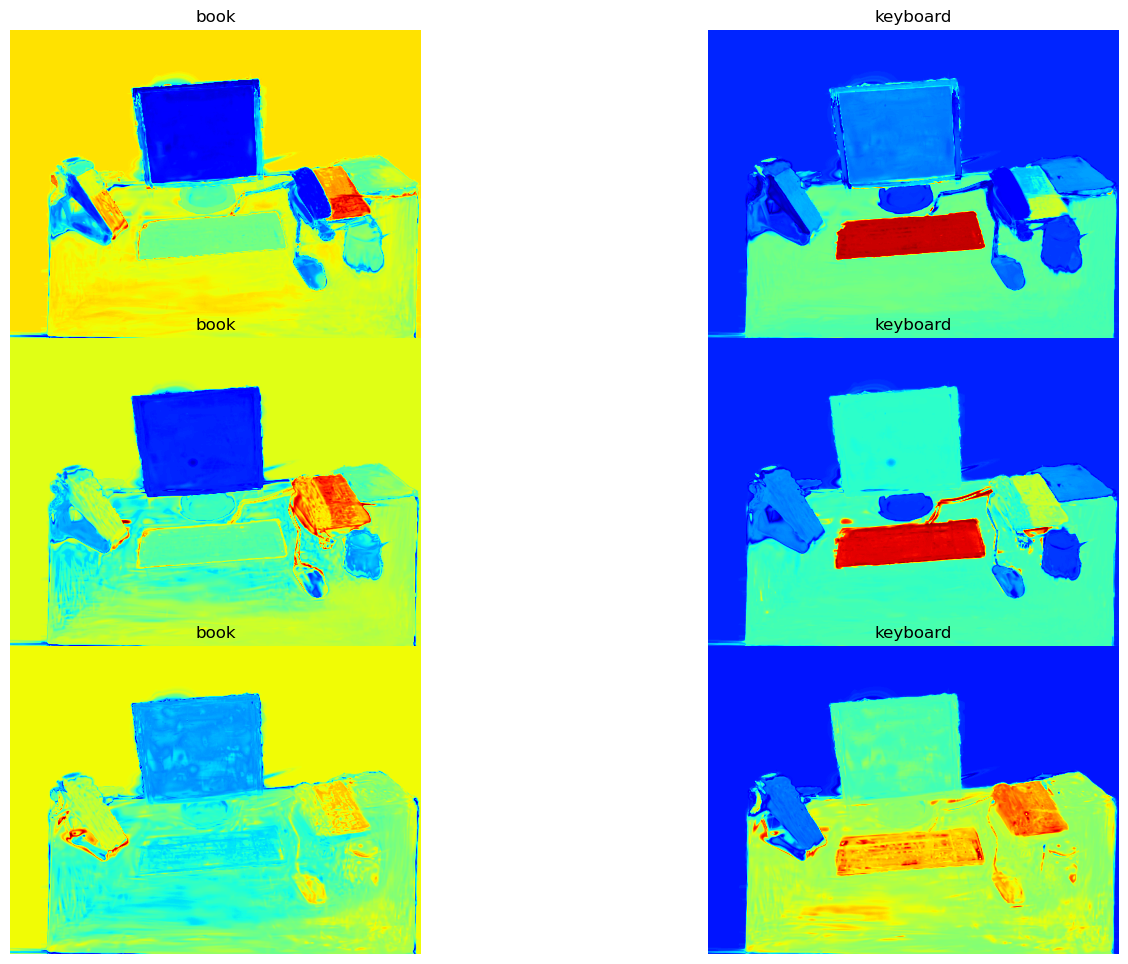

In [100]:
# visualize selected imgs
fig, axs = plt.subplots(n_head, n_prompt, figsize=(6*n_head,6*n_prompt))
for i in range(n_head):
    for j in range(n_prompt):
        axs[i,j].imshow(valid_map[i,j,...].cpu().numpy(),cmap='jet')
        axs[i,j].title.set_text(queries[j])
        plt.subplots_adjust(wspace=0, hspace=0)
[ax.axis('off') for ax_row in axs for ax in ax_row];

In [107]:
import eval.colormaps

for k in range(n_prompt):
    select_output = valid_map[:, k]

    # NOTE 平滑后的激活值图中找最大值点
    scale = 30
    kernel = np.ones((scale,scale)) / (scale**2)
    np_relev = select_output.cpu().numpy()
    avg_filtered = cv2.filter2D(np_relev.transpose(1,2,0), -1, kernel)

    score_lvl = np.zeros((n_head,))
    coord_lvl = []
    for i in range(n_head):
        score = avg_filtered[..., i].max()
        coord = np.nonzero(avg_filtered[..., i] == score)
        score_lvl[i] = score
        coord_lvl.append(np.asarray(coord).transpose(1,0)[..., ::-1])

    selec_head = np.argmax(score_lvl)
    coord_final = coord_lvl[selec_head]

    # NOTE 将平均后的结果与原结果相加，抑制噪声并保持激活边界清晰
    avg_filtered = torch.from_numpy(avg_filtered[..., selec_head]).unsqueeze(-1).to(select_output.device)
    torch_relev = 0.5 * (avg_filtered + select_output[selec_head].unsqueeze(-1))
    p_i = torch.clip(torch_relev - 0.5, 0, 1)
    valid_composited = colormaps.apply_colormap(p_i / (p_i.max() + 1e-6), colormaps.ColormapOptions("turbo"))
    mask = (torch_relev < 0.5).squeeze()
    valid_composited[mask, :] = image[mask, :] * 0.3

    plt.imshow(valid_composited)

ModuleNotFoundError: No module named 'colors'